# Calculating Periodograms in Python

Get data from FRED on seasonally unadjusted industrial production at monthly frequencies.

In [1]:
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

start = datetime.datetime(1919, 1, 1)
end = datetime.datetime(2017, 1, 1)

IP = web.DataReader("IPB50001N", "fred", start, end)

Next, let's take the periodogram of the natural log of the data using scipy's signal package.  We will set the scaling to "density' and make sure that axis=0, so that rows are treated as observations over time.

In [4]:
IPfreq, IPper = sig.periodogram(np.log(IP.values), scaling='density', axis=0)

Now let's plot this.  We throw away the first observation which is associated with the lowest freqency at a wavelength of infinity.  For scaling purposes we plot the natural log of the periodogram.

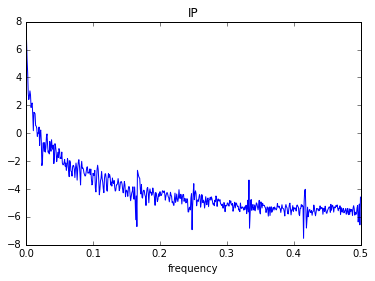

In [7]:
plt.plot(IPfreq[1:], np.log(IPper[1:]))
plt.title('IP')
plt.xlabel('frequency')
plt.show()

We will plot the data over time too, for comparison.

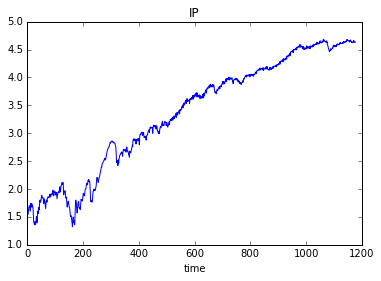

In [8]:
plt.plot(np.log(IP.values))
plt.title('IP')
plt.xlabel('time')
plt.show()